<a href="https://colab.research.google.com/github/dli10/college-rankings-forbes-2019/blob/main/PredictRankings_scale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction using Linear Regression

* Forbes 2019 College Rankings Data Set



In [60]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_theme(style="whitegrid")

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [61]:
import sys
#cwd = os.getcwd()
#print(cwd)

In [62]:
with open('ForbesAmericasTopColleges2019.csv', newline='') as data:
    forbesraw = pd.read_csv(data)

In [63]:
forbesraw.keys()

Index(['Rank', 'Name', 'City', 'State', 'Public/Private',
       'Undergraduate Population', 'Student Population', 'Net Price',
       'Average Grant Aid', 'Total Annual Cost', 'Alumni Salary',
       'Acceptance Rate', 'SAT Lower', 'SAT Upper', 'ACT Lower', 'ACT Upper',
       'Website'],
      dtype='object')

In [64]:
forbesraw.shape

(650, 17)

In [65]:
# Print column names
print(forbesraw.columns)

# Replace spaces in names with underscores
forbesraw.columns = forbesraw.columns.str.replace(' ', '_')
print(forbesraw.columns)

Index(['Rank', 'Name', 'City', 'State', 'Public/Private',
       'Undergraduate Population', 'Student Population', 'Net Price',
       'Average Grant Aid', 'Total Annual Cost', 'Alumni Salary',
       'Acceptance Rate', 'SAT Lower', 'SAT Upper', 'ACT Lower', 'ACT Upper',
       'Website'],
      dtype='object')
Index(['Rank', 'Name', 'City', 'State', 'Public/Private',
       'Undergraduate_Population', 'Student_Population', 'Net_Price',
       'Average_Grant_Aid', 'Total_Annual_Cost', 'Alumni_Salary',
       'Acceptance_Rate', 'SAT_Lower', 'SAT_Upper', 'ACT_Lower', 'ACT_Upper',
       'Website'],
      dtype='object')


In [66]:
forbesraw.head()

,Rank,Name,City,State,Public/Private,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper,Website
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0,web.mit.edu
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu


## Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [67]:
forbesraw.describe()

,Rank,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper
count,650.00000,650.000000,650.000000,648.000000,646.000000,650.000000,635.000000,648.000000,551.000000,551.000000,553.000000,553.000000
mean,325.50000,10002.692308,12022.290769,22336.947531,20031.208978,50330.175385,98851.968504,61.597222,1110.145191,1308.078040,23.278481,28.441230
std,187.78312,11162.172430,13175.091581,8269.912032,11175.869976,13223.055038,14335.249458,22.024781,127.744079,113.553237,3.729318,3.058115
min,1.00000,185.000000,386.000000,0.000000,2975.000000,0.000000,70700.000000,5.000000,820.000000,1060.000000,15.000000,20.000000
25%,163.25000,2020.250000,2240.750000,16410.000000,9288.250000,39917.000000,88600.000000,48.000000,1020.000000,1230.000000,21.000000,26.000000
50%,325.50000,4503.000000,6269.000000,21989.000000,19605.000000,50265.000000,96400.000000,67.000000,1080.000000,1290.000000,22.000000,28.000000
75%,487.75000,15657.000000,17788.000000,27580.500000,27474.500000,60771.750000,105600.000000,78.000000,1180.000000,1380.000000,25.000000,31.000000
max,650.00000,65100.000000,75044.000000,47270.000000,50897.000000,75735.000000,158200.000000,100.000000,1530.000000,1590.000000,34.000000,35.000000


## Linear regression with Forbes 2019 college rankings
***

Here, 

$Y$ = college rankings

and

$X$ = all the other features (or independent variables)

which we will use to fit a linear regression model and predict college rankings. We will use the least squares method as the way to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***

In [68]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [69]:
forbesraw_no_NaN = forbesraw.dropna()
forbesraw_no_NaN.describe()

,Rank,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000
mean,318.500956,10874.346080,13173.776291,22169.518164,19668.535373,50364.416826,99046.271511,61.623327,1111.728489,1310.128107,23.372849,28.510516
std,188.889387,11620.485424,13697.553695,7779.185471,11247.855910,12628.590736,14597.397831,22.078352,128.771497,114.031172,3.763684,3.062782
min,1.000000,323.000000,406.000000,1298.000000,3597.000000,8646.000000,70700.000000,5.000000,820.000000,1060.000000,15.000000,20.000000
25%,154.000000,2151.500000,2500.000000,16258.000000,9034.000000,40009.500000,88600.000000,49.000000,1024.000000,1230.000000,21.000000,26.000000
50%,317.000000,5768.000000,7709.000000,21374.000000,18824.000000,49698.000000,96400.000000,67.000000,1080.000000,1290.000000,22.000000,28.000000
75%,479.500000,17514.500000,20802.000000,27336.000000,26740.000000,60136.500000,106550.000000,78.000000,1180.000000,1380.000000,25.500000,31.000000
max,650.000000,65100.000000,75044.000000,46277.000000,50897.000000,75735.000000,158200.000000,100.000000,1530.000000,1590.000000,34.000000,35.000000


In [70]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('Rank ~ Acceptance_Rate',forbesraw_no_NaN).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     359.3
Date:                Wed, 25 May 2022   Prob (F-statistic):           2.50e-61
Time:                        16:08:29   Log-Likelihood:                -3345.6
No. Observations:                 523   AIC:                             6695.
Df Residuals:                     521   BIC:                             6704.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -18.3185     18.873     

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `Acceptance_Rate` coefficient (5.3484) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. We can interpret the coefficient as, if we compare two colleges, one where the acceptance rate is say $5$ and the other college is the same except that the acceptance rate is $6$. For these two colleges the average difference in acceptance rate is about $5.3484$. The confidence interval gives us a range of plausible values for this difference, about ($4.837, 5.860$).

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), bbut you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is done like this:

`Outcome ~ X1 + X2 + X3`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex, for a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

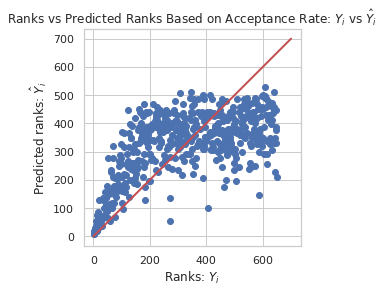

In [71]:
plt.scatter(forbesraw_no_NaN['Rank'], m.fittedvalues)
plt.xlabel("Ranks: $Y_i$")
plt.ylabel("Predicted ranks: $\hat{Y}_i$")
plt.title("Ranks vs Predicted Ranks Based on Acceptance Rate: $Y_i$ vs $\hat{Y}_i$")
plt.plot([0, 700], [0, 700], color='r', linestyle='-', linewidth=2)
plt.gca().set_aspect('equal')

### Fitting Linear Regression using `sklearn`


In [72]:
from sklearn.linear_model import LinearRegression
X = forbesraw_no_NaN.drop('Rank', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object? 

In [73]:
# Look inside linear regression object
# LinearRegression.<tab>
#lm.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [74]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [75]:
forbesraw.head()

,Rank,Name,City,State,Public/Private,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper,Website
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0,web.mit.edu
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu


In [76]:
forbes_num = forbesraw
deletenames = ["Name", "City", "State", "Public/Private", "Website"] # create list of variables not of interest, columns to delete

#deletenames = ["Name", "City", "State", "Public/Private", "Website", 
#               "Undergraduate_Population", "Student_Population",
#               "Net_Price", "Average_Grant_Aid"

for name in deletenames:
  forbes_num = forbes_num.drop(name,1)

forbes_num.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


,Rank,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper
0,1.0,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0
1,2.0,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0
2,3.0,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0
3,4.0,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0
4,5.0,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0


In [77]:
forbes_num.describe()

,Rank,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper
count,650.00000,650.000000,650.000000,648.000000,646.000000,650.000000,635.000000,648.000000,551.000000,551.000000,553.000000,553.000000
mean,325.50000,10002.692308,12022.290769,22336.947531,20031.208978,50330.175385,98851.968504,61.597222,1110.145191,1308.078040,23.278481,28.441230
std,187.78312,11162.172430,13175.091581,8269.912032,11175.869976,13223.055038,14335.249458,22.024781,127.744079,113.553237,3.729318,3.058115
min,1.00000,185.000000,386.000000,0.000000,2975.000000,0.000000,70700.000000,5.000000,820.000000,1060.000000,15.000000,20.000000
25%,163.25000,2020.250000,2240.750000,16410.000000,9288.250000,39917.000000,88600.000000,48.000000,1020.000000,1230.000000,21.000000,26.000000
50%,325.50000,4503.000000,6269.000000,21989.000000,19605.000000,50265.000000,96400.000000,67.000000,1080.000000,1290.000000,22.000000,28.000000
75%,487.75000,15657.000000,17788.000000,27580.500000,27474.500000,60771.750000,105600.000000,78.000000,1180.000000,1380.000000,25.000000,31.000000
max,650.00000,65100.000000,75044.000000,47270.000000,50897.000000,75735.000000,158200.000000,100.000000,1530.000000,1590.000000,34.000000,35.000000


In [78]:
# standard scaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

forbes_num = forbes_num.dropna()
X = forbes_num

X = X.drop('Rank', axis = 1)

scaler = MinMaxScaler()
 
X_scaled = scaler.fit_transform(X.to_numpy())
X_scaled = pd.DataFrame(X_scaled, columns=['Undergraduate_Population', 
                                           'Student_Population',
                                           'Net_Price',
                                           'Average_Grant_Aid',
                                           'Total_Annual_Cost',
                                           'Alumni_Salary',
                                           'Acceptance_Rate',
                                           'SAT_Lower',
                                           'SAT_Upper',
                                           'ACT_Lower',
                                           'ACT_Upper'])
 
print("Scaled Dataset Using MinMaxScaler")
X_scaled.head()

Scaled Dataset Using MinMaxScaler


,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper
0,0.208731,0.411506,0.289669,0.978288,0.908554,0.869714,0.000000,0.901408,1.000000,0.894737,1.0
1,0.124720,0.229481,0.265969,0.983869,0.901236,0.851429,0.000000,0.802817,0.905660,0.894737,1.0
2,0.095095,0.168386,0.385269,1.000000,0.933745,0.772571,0.021053,0.901408,0.981132,0.894737,1.0
3,0.067262,0.148182,0.432935,0.838288,0.876209,0.965714,0.021053,0.943662,0.962264,0.947368,1.0
4,0.082375,0.105402,0.178506,0.940613,0.857130,0.785143,0.010526,0.859155,0.962264,0.842105,1.0


In [79]:
# Use all 13 predictors to fit linear regression model
X = pd.concat((forbes_num['Rank'], X_scaled), 1)
X = X.dropna()
rank = X['Rank']

X = X.drop('Rank', axis = 1)

lm.fit(X, rank)

# your turn
# notice fit_intercept=True and normalize=True
# How would you change the model to not fit an intercept term? 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  


LinearRegression()

In [80]:
X

,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper
0,0.208731,0.411506,0.289669,0.978288,0.908554,0.869714,0.000000,0.901408,1.000000,0.894737,1.000000
1,0.124720,0.229481,0.265969,0.983869,0.901236,0.851429,0.000000,0.802817,0.905660,0.894737,1.000000
2,0.095095,0.168386,0.385269,1.000000,0.933745,0.772571,0.021053,0.901408,0.981132,0.894737,1.000000
3,0.067262,0.148182,0.432935,0.838288,0.876209,0.965714,0.021053,0.943662,0.962264,0.947368,1.000000
4,0.082375,0.105402,0.178506,0.940613,0.857130,0.785143,0.010526,0.859155,0.962264,0.842105,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
518,0.024870,0.028243,0.371396,0.349450,0.476889,0.066286,0.652632,0.169014,0.169811,0.263158,0.400000
519,0.029007,0.024291,0.747682,0.290085,0.597371,0.320000,0.726316,0.183099,0.188679,0.157895,0.200000
521,0.205366,0.178957,0.260433,0.120507,0.362086,0.170286,0.842105,0.112676,0.094340,0.105263,0.200000
522,0.011902,0.010986,0.401121,0.498055,0.588084,0.000000,0.705263,0.236620,0.207547,0.210526,0.333333


### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [81]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 680.3891350470083


In [82]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 11


In [83]:
zip(X.columns, lm.coef_)

In [84]:
# The coefficients
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,Undergraduate_Population,-227.270627
1,Student_Population,139.633129
2,Net_Price,-26.879833
3,Average_Grant_Aid,145.304498
4,Total_Annual_Cost,-232.375900
5,Alumni_Salary,-173.484796
6,Acceptance_Rate,10.680336
7,SAT_Lower,-100.089859
8,SAT_Upper,-69.380414
9,ACT_Lower,-231.685082


### Predict Prices 

We can calculate the predicted ranks ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [85]:
# first five predicted ranks
lm.predict(X)[0:5]

array([-2.93219390e+01, -1.29110351e+01, -2.43251554e+01, -8.08508303e+01,
       -5.80354019e-02])

Text(0, 0.5, 'Frequency')

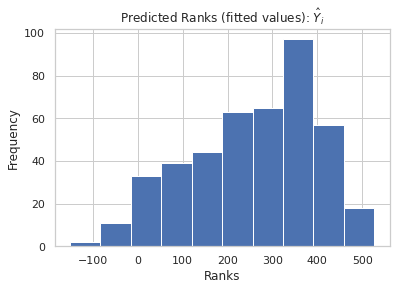

In [86]:
plt.hist(lm.predict(X))
plt.title('Predicted Ranks (fitted values): $\hat{Y}_i$')
plt.xlabel('Ranks')
plt.ylabel('Frequency')

Let's plot the true prices compared to the predicted prices to see they disagree, we saw this exactly before but this is how you access the predicted values in using `sklearn`.

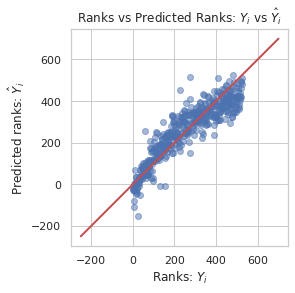

In [87]:
plt.scatter(rank, lm.predict(X), alpha=0.5)
plt.xlabel("Ranks: $Y_i$")
plt.ylabel("Predicted ranks: $\hat{Y}_i$")
plt.title("Ranks vs Predicted Ranks: $Y_i$ vs $\hat{Y}_i$")
plt.plot([-250, 700], [-250, 700], color='r', linestyle='-', linewidth=2)
plt.gca().set_aspect('equal')

#plt.savefig('true_vs_predicted.png')

### Residual sum of squares

Let's calculate the residual sum of squares 

$$ S = \sum_{i=1}^N r_i = \sum_{i=1}^N (y_i - (\beta_0 + \beta_1 x_i))^2 $$

The large residual sum of squares and mean squared error below indicate that this kind of linear regression model does not fit well to our dataset. Given more time, we would like to explore using different model or possibly a combination of models that are more compatible with our dataset.

In [88]:
print(np.sum((rank - lm.predict(X)) ** 2))

1798866.7086221152


#### Mean squared error

In [89]:
mseFull = np.mean((rank - lm.predict(X)) ** 2)
print(mseFull)

4193.1624909606435


## Relationship between `Total Annual Cost` and rank
***

Try fitting a linear regression model using only the 'Total Annual Cost'

Calculate the mean squared error. 


In [90]:
lm = LinearRegression()
lm.fit(X[['Total_Annual_Cost']], rank)

LinearRegression()

In [91]:
mseTAC = np.mean((rank - lm.predict(X[['Total_Annual_Cost']])) ** 2)
print(mseTAC)

13480.027008100406


We can also plot the fitted linear regression line. 

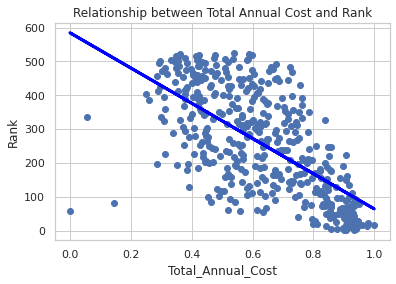

In [94]:
plt.scatter(X['Total_Annual_Cost'], rank)
plt.xlabel("Total_Annual_Cost")
plt.ylabel("Rank")
plt.title("Relationship between Total Annual Cost and Rank")

plt.plot(X['Total_Annual_Cost'], lm.predict(X[['Total_Annual_Cost']]), color='blue', linewidth=3)
plt.show()

# Part 3: Training and Test Data sets

### Purpose of splitting data into Training/testing sets
***
<div class="span5 alert alert-info">

<p> Let's stick to the linear regression example: </p>
<ul>
  <li> We built our model with the requirement that the model fit the data well. </li>
  <li> As a side-effect, the model will fit <b>THIS</b> dataset well. What about new data? </li>
    <ul>
      <li> We wanted the model for predictions, right?</li>
    </ul>
  <li> One simple solution, leave out some data (for <b>testing</b>) and <b>train</b> the model on the rest </li>
  <li> This also leads directly to the idea of cross-validation, next section. </li>  
</ul>
</div>

***

One way of doing this is you can create training and testing data sets manually. 

In [95]:
X_train = X[:-50]
X_test = X[-50:]
Y_train = rank[:-50]
Y_test = rank[-50:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(379, 11)
(50, 11)
(379,)
(50,)


Another way, is to split the data into random train and test subsets using the function `train_test_split` in `sklearn.cross_validation`. 

In [96]:
# let's look at the function in the help file
#sklearn.model_selection.train_test_split?

In [97]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, rank, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(287, 11)
(142, 11)
(287,)
(142,)


Your turn.  Let's build a linear regression model using our new training data sets. 

In [98]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

Now, calculate the mean squared error using just the test data and compare to mean squared from using all the data to fit the model. 

In [99]:
print("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 4098.619051113753
Fit a model X_train, and calculate MSE with X_test, Y_test: 4699.804305081397


#### Residual plots

Text(0.5, 0, 'Predicted ranks: $\\hat{Y}_i$')

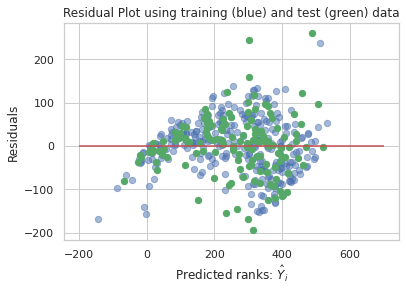

In [100]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=-200, xmax = 700, colors = 'r')
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.xlabel("Predicted ranks: $\hat{Y}_i$")

#plt.savefig('residuals.png')

# Logistic Regression Model

As we ran into an convergence error when trying to use a logistic regression model, we believe that a logistic regression model would likely not give us better results than the linear regression model.

In [101]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, rank)
pred_train = logreg.predict(X_train)
pred_test = logreg.predict(X_test)

In [102]:
print("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - logreg.predict(X_train)) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - logreg.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 11891.564459930314
Fit a model X_train, and calculate MSE with X_test, Y_test: 12426.521126760563


Text(0, 0.5, 'Residuals')

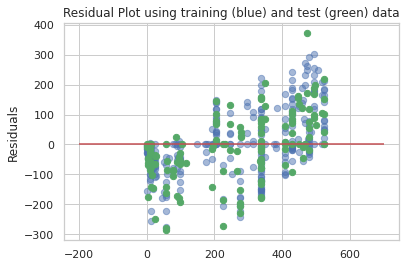

In [103]:
plt.scatter(logreg.predict(X_train), logreg.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(logreg.predict(X_test), logreg.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=-200, xmax = 700, colors='r')
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')